# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('dark_background')

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [69]:
chipo = pd.read_table(r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")


### Step 4. See the first 10 entries

In [70]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [71]:
#chipo.groupby("item_name")['quantity'].sum().sort_values(ascending=False)
top_five = pd.DataFrame(chipo['item_name'].value_counts().head(5))

In [72]:
top_five

,count
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


<BarContainer object of 5 artists>

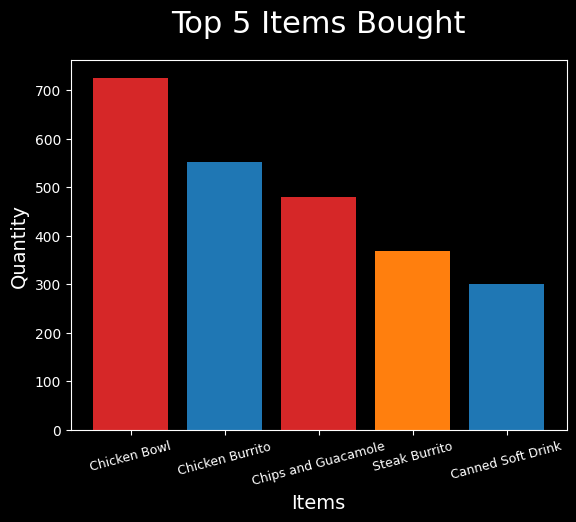

In [73]:
plt.title("Top 5 Items Bought",fontsize=22,pad=20)
plt.xlabel("Items",fontsize=14)
plt.ylabel("Quantity",fontsize=14)
plt.tick_params(labelsize=9,axis="x")
plt.xticks(rotation=15)
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange', 'tab:blue']
plt.bar(top_five.index,top_five['count'],linewidth=5,color=bar_colors)

### Step 6. Create a scatterplot with the number of items orderered per order ID
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [74]:
chipo['order_price'] = chipo.item_price.str[1:].astype(float) * chipo.quantity
chipo['item_price'] = chipo.item_price.str[1:].astype(float)


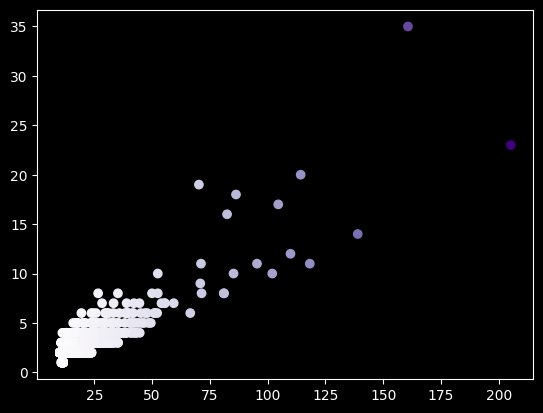

In [75]:
grouped_data = chipo.groupby('order_id').sum()
grouped_data
plt.scatter(x=grouped_data.item_price,y=grouped_data.quantity,c=grouped_data.item_price,cmap=plt.cm.Purples)